In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

### read

In [2]:
df = pd.read_csv('credit_card.txt')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### describe

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Text(0, 0.5, '')

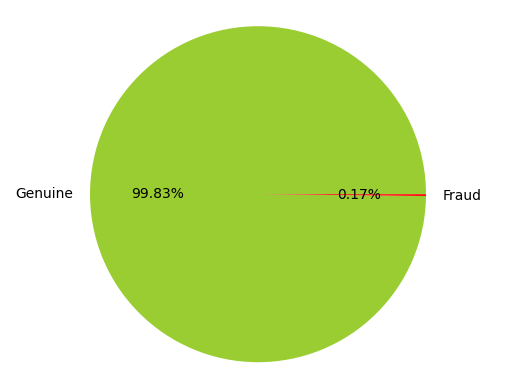

In [6]:
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.2f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

very unbalanced dataset - 0.17% of fraud

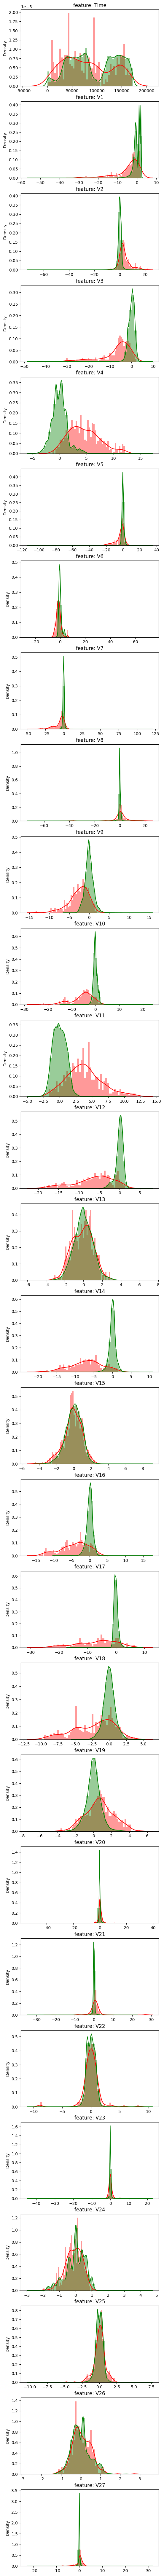

In [7]:
#let us check correlations and shapes of 25 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

### split dataset into fraud and normal

In [8]:
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [9]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### create a sample of normal operations whose length is equal to the length of fraudulent ones

In [12]:
normal_sample = normal.sample(n=len(fraud))

In [13]:
normal_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176973,122987.0,2.059512,-0.483604,-0.779463,0.544385,-0.307491,-0.171710,-0.347334,-0.173766,-0.505787,...,-0.827082,-1.798951,0.434161,-0.828963,-0.407400,-1.119607,0.066503,-0.024210,38.59,0
4079,3735.0,1.378056,-0.456805,0.511882,-0.584852,-0.760254,-0.338674,-0.771106,-0.069195,0.652535,...,-0.247130,-0.605365,0.136115,-0.383080,0.151996,-0.466222,-0.007227,0.008738,15.75,0
119938,75641.0,1.275308,-0.066489,0.364585,0.121995,-0.750010,-1.121757,-0.125895,-0.140755,0.428135,...,-0.105374,-0.366336,0.046339,0.419240,0.205994,0.951467,-0.090771,0.002790,10.00,0
22957,32520.0,0.372684,1.900896,-2.065304,1.597400,0.847072,-1.237740,0.464242,0.379911,-0.889354,...,-0.006051,0.139810,0.168856,-0.105808,-0.545450,-0.401086,0.149554,-0.057324,0.89,0
213771,139386.0,-1.687434,-1.091791,-2.620156,0.020165,1.694592,-1.586651,2.166496,-0.466844,-0.369637,...,0.302029,1.754205,1.801224,0.639126,-0.676755,0.403158,0.421621,-0.154254,235.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203485,134840.0,-0.270047,0.947018,-1.011706,-0.283645,2.055919,-0.806025,2.194543,-0.518089,-0.385562,...,0.102760,0.411110,-0.057722,0.275919,-0.195339,-0.901313,0.019041,0.046338,90.48,0
46609,42856.0,1.496625,-1.320521,0.303578,-1.673586,-1.361429,0.155657,-1.444442,0.150974,-1.572803,...,-0.088465,0.017510,-0.159444,-0.881413,0.412413,-0.045901,0.033847,0.005936,33.00,0
8028,10999.0,-0.327776,0.835785,1.807071,0.154191,-0.225360,-0.347658,0.141418,-0.189202,1.009220,...,0.038605,0.413725,-0.175594,0.085003,-0.549790,1.110650,-0.056137,0.119433,15.95,0
96388,65748.0,-2.106986,-1.737232,1.129765,-2.493541,0.217604,0.176651,-1.328604,0.789292,-2.644878,...,0.167876,0.193891,-0.229101,-1.325355,0.580249,-0.092811,0.204878,-0.185539,91.00,0


In [14]:
df_balanced = pd.concat([normal_sample,fraud])
df_balanced = df_balanced.reset_index(drop=True)

In [15]:
df_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,122987.0,2.059512,-0.483604,-0.779463,0.544385,-0.307491,-0.171710,-0.347334,-0.173766,-0.505787,...,-0.827082,-1.798951,0.434161,-0.828963,-0.407400,-1.119607,0.066503,-0.024210,38.59,0
1,3735.0,1.378056,-0.456805,0.511882,-0.584852,-0.760254,-0.338674,-0.771106,-0.069195,0.652535,...,-0.247130,-0.605365,0.136115,-0.383080,0.151996,-0.466222,-0.007227,0.008738,15.75,0
2,75641.0,1.275308,-0.066489,0.364585,0.121995,-0.750010,-1.121757,-0.125895,-0.140755,0.428135,...,-0.105374,-0.366336,0.046339,0.419240,0.205994,0.951467,-0.090771,0.002790,10.00,0
3,32520.0,0.372684,1.900896,-2.065304,1.597400,0.847072,-1.237740,0.464242,0.379911,-0.889354,...,-0.006051,0.139810,0.168856,-0.105808,-0.545450,-0.401086,0.149554,-0.057324,0.89,0
4,139386.0,-1.687434,-1.091791,-2.620156,0.020165,1.694592,-1.586651,2.166496,-0.466844,-0.369637,...,0.302029,1.754205,1.801224,0.639126,-0.676755,0.403158,0.421621,-0.154254,235.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


### Splitting into features and targets

In [16]:
def split(df):
    X = df.drop(columns='Class', axis=1)
    Y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
    print(X.shape, X_train.shape, X_test.shape)
    return X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = split(df)

(284807, 30) (227845, 30) (56962, 30)


### 1st Model: Naive Bayes Classifier

In [18]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [19]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
train_pred = clf.predict(X_train)

In [20]:
def print_metrix(y_test,y_pred):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [21]:
print_metrix(y_test,y_pred)

test-set confusion matrix:
 [[56516   348]
 [   30    68]]
recall score:  0.6938775510204082
precision score:  0.16346153846153846
f1 score:  0.26459143968871596
accuracy score:  0.9933639970506654
ROC AUC: 0.9772953620812421


In [22]:
#try to use balaced dataset

In [23]:
X_train, X_test, y_train, y_test = split(df_balanced)

(984, 30) (787, 30) (197, 30)


In [24]:
clf.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)
train_pred = clf.predict(X_train)

In [26]:
print_metrix(y_test,y_pred)

test-set confusion matrix:
 [[97  2]
 [26 72]]
recall score:  0.7346938775510204
precision score:  0.972972972972973
f1 score:  0.8372093023255814
accuracy score:  0.8578680203045685
ROC AUC: 0.9619666048237476


### 2nd Model: Logistic Regression

In [27]:
model = LogisticRegression()

In [29]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
print_metrix(y_test,y_pred)

test-set confusion matrix:
 [[94  5]
 [13 85]]
recall score:  0.8673469387755102
precision score:  0.9444444444444444
f1 score:  0.9042553191489362
accuracy score:  0.9086294416243654
ROC AUC: 0.9619666048237476


### 3rd Model: Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(df[['Amount']])

In [ ]:
X2 = df.drop(columns='Class', axis=1)
Y2 = df['Class']

oversampling for imbalance dataset:

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE()

In [ ]:
x_res,y_res = sm.fit_resample(X2,Y2)

In [ ]:
y_res.value_counts()

Splitting into features and targets:

In [ ]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(x_res,y_res,test_size=0.3,random_state=42)

model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model2 = RandomForestClassifier()

In [ ]:
model2.fit(X_train2,Y_train2)

In [ ]:
predicted2 = model2.predict(X_test2)

accuracy on test data:

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
accuracy_score(Y_test2, predicted2)